# Julia Benchmarking
---

This notebook explores visualizations of benchmarking results realized by The computer language benchmarks game. They measured the performances on a quad-core 3.0GHz Intel® i5-3330® with 15.8 GiB of RAM and 2TB SATA disk drive, using Ubuntu™ 21.04 x86_64 GNU/Linux 5.11.0-18-generic.    
The programming languages  and their versions contained in the benchmarking data file are:     
* Julia, julia version 1.6.0
* Python 3, Python 3.9.2
* C gcc, gcc (Ubuntu 10.3.0-1ubuntu1) 10.3.0
* Lisp SBCL, SBCL 2.1.1
* Java, "openjdk 17 2021-09-14   
    OpenJDK Runtime Environment (build 17+35-2724)   
    OpenJDK 64-Bit Server VM (build 17+35-2724, mixed mode, sharing)"

In [1]:
#############
# Libraries #
#############

using DataFrames, CSV
using Statistics, Plots

In [2]:
###################
# External source #
###################
include("notebookFormatting.jl");

In [3]:
########
# Data #
########
dataFile = "../data/benchmark.csv "
df = CSV.read(realpath(dataFile), DataFrame; header = 8, skipto=9)

,program,language,secs,mem,gz,busy,cpu load
,String31,String15,Float64,Int64,Int64,String15,String31
1,n-body,Julia,4.05,218740,1111,4.36,3% 2% 3% 100%
2,n-body,Python 3,567.56,8076,1196,570.95,0% 0% 0% 100%
3,n-body,C gcc,2.18,768,1633,2.19,0% 100% 0% 0%
4,n-body,Lisp SBCL,7.83,17892,1403,7.88,0% 0% 100% 0%
5,n-body,Java,6.77,35432,1489,6.82,100% 1% 0% 0%
6,mandelbrot,Julia,1.32,227836,624,4.66,98% 86% 85% 85%
7,mandelbrot,Python 3,163.32,12080,688,642.00,98% 98% 98% 98%
8,mandelbrot,C gcc,1.27,31792,1135,5.08,100% 100% 99% 100%
9,mandelbrot,Lisp SBCL,4.09,46684,2447,16.19,99% 99% 99% 99%


## Visualization

In [4]:
df1 = select(df, [:program, :language, :secs ])
df1wide = unstack(df1, :language, :program, :secs)
# df1wide[:, 2:end] = log10.(df1wide[:, 2:end])
sort!(df1wide, [:mandelbrot])
df1wide
# df1 = filter(:program => x -> x == "n-body", df)

,language,n-body,mandelbrot,spectral-norm,fannkuch-redux,fasta,k-nucleotide
,String15,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,C gcc,2.18,1.27,0.4,7.58,0.78,3.72
2,Julia,4.05,1.32,1.11,7.64,1.12,5.12
3,Lisp SBCL,7.83,4.09,1.44,9.63,4.71,10.29
4,Java,6.77,4.12,1.58,10.38,1.19,4.85
5,Python 3,567.56,163.32,120.99,352.29,37.32,46.28


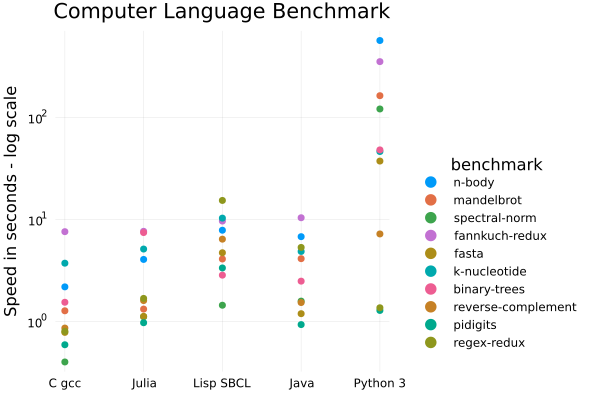

In [28]:
XtickLabel = df1wide.language 
# scatter(Matrix(sqrt.(df1wide[:,2:end])),
scatter(Matrix(df1wide[:,2:end]),
        xticks=(1:5, XtickLabel),
    legend =:outerbottomright, label =permutedims(names(df1wide)[2:end]),
    ylabel = "Speed in seconds - log scale", 
    title = "Computer Language Benchmark",
    yaxis=:log, markerstrokewidth = 0, showaxis= false,
    legendtitle = "benchmark", foreground_color_legend = nothing)

In [29]:
savefig("images/benchmark_new.svg")

In [9]:
dfGroup = groupby(df,:language);
dfSecsMedian =  combine(dfGroup, :secs .=> median => :secs)
sort!(dfSecsMedian, :secs)
dfSecsMedian.secs = round.(dfSecsMedian.secs, digits = 2);

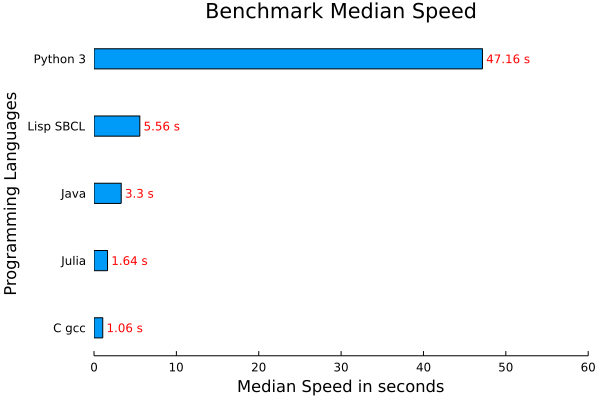

In [21]:
ticklabel = dfSecsMedian.language
annOffset = 0.5
xAnn = dfSecsMedian.secs .+ annOffset
yAnn = collect(1:5)
bar((dfSecsMedian.secs), orientation=:h, 
    yticks=(1:5, ticklabel), yflip=false,
    series_annotations = Plots.text.(" ".*string.(dfSecsMedian.secs).*" s",8, :red,:left),
    bar_width = 0.3,    
    legend = false, grid = false,yaxis = false,
    xlabel = "Median Speed in seconds", ylabel = "Programming Languages",
    title = "Benchmark Median Speed" )
xlims!(0, 60)


In [22]:
savefig("images/benchmark_median.svg")